In [1]:
import numpy as np
import pandas as pd 
import tensorflow
from sklearn.model_selection import train_test_split
from keras import models,layers
from keras.callbacks import EarlyStopping
from keras.regularizers import l2
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [2]:
diabetes_data = pd.read_csv('diabetes.csv')

In [3]:
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
diabetes_data.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [5]:
diabetes_data.shape

(768, 9)

In [6]:
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
diabetes_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [8]:
diabetes_data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [9]:
diabetes_data['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [10]:
diabetes_data.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


Now Its turn for Data Preprocessing : 

In [11]:
X = diabetes_data.drop('Outcome',axis=1)
Y = diabetes_data['Outcome']

In [12]:
print(X)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


In [13]:
print(Y)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


In [14]:
ss = StandardScaler()

In [15]:
scalarized_X = ss.fit_transform(X)

In [16]:
print(scalarized_X)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]


In [17]:
diabetes_X = pd.DataFrame(data=scalarized_X , columns= X.columns)

In [18]:
diabetes_X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496


Splitting of Data into Training Data and Test Data

In [19]:
X_train,X_test,Y_train,Y_test = train_test_split(diabetes_X,Y,test_size=0.25,random_state=0,stratify=Y)

In [20]:
print(X.shape,X_train.shape,X_test.shape)

(768, 8) (576, 8) (192, 8)


Neural Network Model(ANN) Building and Training

In [21]:
model = models.Sequential()

In [22]:
model.add(layers.Dense(units=16,activation='relu',input_dim = X_train.shape[1]))
model.add(layers.Dense(units=8,activation='relu'))
model.add(layers.Dense(units=4,activation='relu'))
model.add(layers.Dense(units=1,activation='sigmoid'))

In [23]:
model.compile(optimizer='adam',metrics=['accuracy'],loss = 'binary_crossentropy')

In [24]:
history = model.fit(X_train,Y_train,epochs=100,batch_size=25,validation_data=(X_test,Y_test),callbacks=EarlyStopping())

Epoch 1/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.6442 - loss: 0.6741 - val_accuracy: 0.6719 - val_loss: 0.6574
Epoch 2/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6917 - loss: 0.6535 - val_accuracy: 0.6562 - val_loss: 0.6341
Epoch 3/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6148 - loss: 0.6387 - val_accuracy: 0.6562 - val_loss: 0.6084
Epoch 4/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6407 - loss: 0.6200 - val_accuracy: 0.6510 - val_loss: 0.5849
Epoch 5/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6672 - loss: 0.5918 - val_accuracy: 0.6667 - val_loss: 0.5606
Epoch 6/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6678 - loss: 0.5805 - val_accuracy: 0.6927 - val_loss: 0.5410
Epoch 7/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7115 - loss: 0.5576 - val_accuracy: 0.7396 - val_loss: 0.5256
Epoch 8/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7112 - loss: 0.5591 - val_accuracy: 0.7292 - 

In [25]:
loss, accuracy = model.evaluate(X_test, Y_test, verbose=0)
print(f"Test Accuracy: {accuracy:.4f}")

Test Accuracy: 0.7812


In [26]:
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)




6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


In [27]:
from sklearn.metrics import confusion_matrix,classification_report
import seaborn as sns
import matplotlib.pyplot as plt

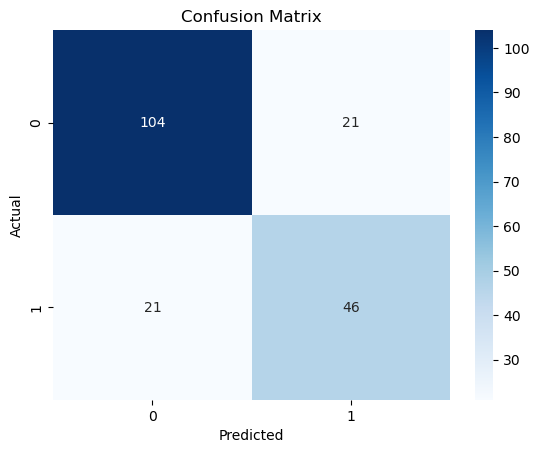

In [28]:
cm = confusion_matrix(Y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [29]:
print("\nClassification Report:")
print(classification_report(Y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.83      0.83       125
           1       0.69      0.69      0.69        67

    accuracy                           0.78       192
   macro avg       0.76      0.76      0.76       192
weighted avg       0.78      0.78      0.78       192



Predictive System For Diabetes Using ANN

In [36]:
user_input = [0,137,40,35,168,43.1,2.288,33]  

# Convert to numpy array and reshape for prediction
user_input_array = np.array(user_input).reshape(1, -1)

# Scale using the same scaler used for training data
user_input_scaled = ss.transform(user_input_array)

# Make prediction
prediction = model.predict(user_input_scaled)
result = "Diabetic" if prediction[0][0] > 0.5 else "Non-Diabetic"

print(f"\nPrediction: {result} (Probability: {prediction[0][0]:.2f})")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step

Prediction: Diabetic (Probability: 0.84)
